# Data Preparation

Check the latest version of the tensolflow.

In [3]:
!pip freeze| grep tensorflow==2.1 || pip install tensorflow==2.1

tensorflow==2.1.0


#### Importing Libraries

In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

%matplotlib inline

#### Loading the dataset

In [5]:
if not os.path.isdir("data/transport"):
    os.makedirs("/data/transport")     

In [9]:
!ls -l data/transport


total 96
-rw-r--r--  1 dhavaldangaria  staff  48343 Jan  7 15:44 untidy_vehicle_data.csv


#### Read Dataset into a Pandas DataFrame

In [10]:
df_transport=pd.read_csv("data/transport/untidy_vehicle_data.csv")
df_transport.head()

,Date,Zip Code,Model Year,Fuel,Make,Light_Duty,Vehicles
0,10/1/2018,90000,2006,Gasoline,OTHER/UNK,NaN,1.0
1,10/1/2018,NaN,2014,Gasoline,NaN,Yes,1.0
2,NaN,90000,NaN,Gasoline,OTHER/UNK,Yes,NaN
3,10/1/2018,90000,2017,Gasoline,OTHER/UNK,Yes,1.0
4,10/1/2018,90000,<2006,Diesel and Diesel Hybrid,OTHER/UNK,No,55.0


###### collecting ginformation on dataframe

In [11]:
df_transport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        997 non-null    object 
 1   Zip Code    997 non-null    object 
 2   Model Year  997 non-null    object 
 3   Fuel        996 non-null    object 
 4   Make        996 non-null    object 
 5   Light_Duty  996 non-null    object 
 6   Vehicles    996 non-null    float64
dtypes: float64(1), object(6)
memory usage: 54.8+ KB


###### Printing the first and last five rows of each column. 

In [12]:
print(df_transport,5)

          Date Zip Code Model Year                      Fuel       Make  \
0    10/1/2018    90000       2006                  Gasoline  OTHER/UNK   
1    10/1/2018      NaN       2014                  Gasoline        NaN   
2          NaN    90000        NaN                  Gasoline  OTHER/UNK   
3    10/1/2018    90000       2017                  Gasoline  OTHER/UNK   
4    10/1/2018    90000      <2006  Diesel and Diesel Hybrid  OTHER/UNK   
..         ...      ...        ...                       ...        ...   
994   6/7/2019    90003       2012                  Gasoline     Type_R   
995   6/8/2019    90003       2012           Hybrid Gasoline  OTHER/UNK   
996   6/9/2019    90003       2012           Hybrid Gasoline     Type_Q   
997  6/10/2019    90003       2012               Natural Gas  OTHER/UNK   
998  6/11/2019    90003       2012            Plug-in Hybrid  OTHER/UNK   

    Light_Duty  Vehicles  
0          NaN       1.0  
1          Yes       1.0  
2          Yes    

###### summary statistics for the numeric fields in our dataframe.

In [13]:
df_transport.describe()

,Vehicles
count,996.000000
mean,72.878514
std,229.696895
min,1.000000
25%,13.000000
50%,23.000000
75%,57.250000
max,3178.000000


In [14]:
group_data=df_transport.groupby(['Zip Code','Model Year','Fuel','Make','Light_Duty','Vehicles'])
df_transport.groupby('Fuel').first() 

,Date,Zip Code,Model Year,Make,Light_Duty,Vehicles
Fuel,,,,,,
Battery Electric,10/1/2018,90000,<2006,OTHER/UNK,No,4.0
Diesel and Diesel Hybrid,10/1/2018,90000,<2006,OTHER/UNK,No,55.0
Flex-Fuel,10/14/2018,90001,2007,Type_A,Yes,78.0
Gasoline,10/1/2018,90000,2006,OTHER/UNK,Yes,1.0
Hybrid Gasoline,10/24/2018,90001,2009,OTHER/UNK,Yes,18.0
Natural Gas,10/25/2018,90001,2009,OTHER/UNK,No,2.0
Other,10/8/2018,90000,<2006,OTHER/UNK,Yes,6.0
Plug-in Hybrid,11/2/2018,90001,2012,OTHER/UNK,Yes,1.0


###### Checking for null values

In [15]:
df_transport.isnull().sum()

Date          2
Zip Code      2
Model Year    2
Fuel          3
Make          3
Light_Duty    3
Vehicles      3
dtype: int64

In [16]:
print (df_transport['Date'])

0      10/1/2018
1      10/1/2018
2            NaN
3      10/1/2018
4      10/1/2018
         ...    
994     6/7/2019
995     6/8/2019
996     6/9/2019
997    6/10/2019
998    6/11/2019
Name: Date, Length: 999, dtype: object


In [17]:
print (df_transport['Date'].isnull())

0      False
1      False
2       True
3      False
4      False
       ...  
994    False
995    False
996    False
997    False
998    False
Name: Date, Length: 999, dtype: bool


In [18]:
print (df_transport['Make'])
print (df_transport['Make'].isnull())

0      OTHER/UNK
1            NaN
2      OTHER/UNK
3      OTHER/UNK
4      OTHER/UNK
         ...    
994       Type_R
995    OTHER/UNK
996       Type_Q
997    OTHER/UNK
998    OTHER/UNK
Name: Make, Length: 999, dtype: object
0      False
1       True
2      False
3      False
4      False
       ...  
994    False
995    False
996    False
997    False
998    False
Name: Make, Length: 999, dtype: bool


In [19]:
print (df_transport['Model Year'])
print (df_transport['Model Year'].isnull())

0       2006
1       2014
2        NaN
3       2017
4      <2006
       ...  
994     2012
995     2012
996     2012
997     2012
998     2012
Name: Model Year, Length: 999, dtype: object
0      False
1      False
2       True
3      False
4      False
       ...  
994    False
995    False
996    False
997    False
998    False
Name: Model Year, Length: 999, dtype: bool


In [23]:
print ("Rows     : " ,df_transport.shape[0])
print ("Columns  : " ,df_transport.shape[1])
print ("\nFeatures : \n" ,df_transport.columns.tolist())
print ("\nUnique values :  \n",df_transport.nunique())
print ("\nMissing values :  ", df_transport.isnull().sum().values.sum())

Rows     :  999
Columns  :  7

Features : 
 ['Date', 'Zip Code', 'Model Year', 'Fuel', 'Make', 'Light_Duty', 'Vehicles']

Unique values :  
 Date          248
Zip Code        6
Model Year     15
Fuel            8
Make           43
Light_Duty      3
Vehicles      210
dtype: int64

Missing values :   18


In [24]:
df_transport.tail()

,Date,Zip Code,Model Year,Fuel,Make,Light_Duty,Vehicles
994,6/7/2019,90003,2012,Gasoline,Type_R,Yes,26.0
995,6/8/2019,90003,2012,Hybrid Gasoline,OTHER/UNK,Yes,4.0
996,6/9/2019,90003,2012,Hybrid Gasoline,Type_Q,Yes,25.0
997,6/10/2019,90003,2012,Natural Gas,OTHER/UNK,Yes,1.0
998,6/11/2019,90003,2012,Plug-in Hybrid,OTHER/UNK,Yes,3.0


###### Resolving Missing Values

In [27]:
df_transport.isnull().sum()

Date          2
Zip Code      2
Model Year    2
Fuel          3
Make          3
Light_Duty    3
Vehicles      3
dtype: int64

In [32]:
#Using the apply function with lambda.
#when we don't pass the argument axis =1  in apply, it will conside the column rather than row
#value_counts() count the how many time each vaues are assigned and we are taking the most 
#frequently assigned value
df_transport = df_transport.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [33]:
df_transport.isnull().sum()

Date          0
Zip Code      0
Model Year    0
Fuel          0
Make          0
Light_Duty    0
Vehicles      0
dtype: int64

###### Converting the Date Feature Column to a Datetime Format

In [34]:
df_transport['Date']= pd.to_datetime(df_transport['Date'],
                                    format='%m/%d/%Y')

In [35]:
df_transport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        999 non-null    datetime64[ns]
 1   Zip Code    999 non-null    object        
 2   Model Year  999 non-null    object        
 3   Fuel        999 non-null    object        
 4   Make        999 non-null    object        
 5   Light_Duty  999 non-null    object        
 6   Vehicles    999 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 54.8+ KB


In [36]:
# Now we will parse Date into three columns that is year, month, and day.
df_transport['year'] = df_transport['Date'].dt.year
df_transport['month'] = df_transport['Date'].dt.month
df_transport['day'] = df_transport['Date'].dt.day

In [37]:
df_transport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        999 non-null    datetime64[ns]
 1   Zip Code    999 non-null    object        
 2   Model Year  999 non-null    object        
 3   Fuel        999 non-null    object        
 4   Make        999 non-null    object        
 5   Light_Duty  999 non-null    object        
 6   Vehicles    999 non-null    float64       
 7   year        999 non-null    int64         
 8   month       999 non-null    int64         
 9   day         999 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 78.2+ KB


In [46]:
#grouping by on the column "Make"
grouped_data = df_transport.groupby(['Make'])
                                    
#Getting the first entry for each month
df_transport.groupby('month').first()

,Date,Zip Code,Model Year,Fuel,Make,Light_Duty,Vehicles,year,day
month,,,,,,,,,
1,2019-01-01,90001,2016,Gasoline,Type_G,Yes,18.0,2019,1
2,2019-02-01,90001,2017,Gasoline,Type_D,Yes,13.0,2019,1
3,2019-03-01,90001,2018,Gasoline,Type_C,Yes,32.0,2019,1
4,2019-04-01,90003,2006,Gasoline,Type_U,Yes,13.0,2019,1
5,2019-05-01,90003,2007,Gasoline,Type_GG,Yes,13.0,2019,1
6,2019-06-01,90003,2008,Gasoline,Type_J,Yes,15.0,2019,1
7,2019-07-01,90003,2009,Gasoline,Type_J,Yes,141.0,2019,1
10,2018-10-01,90000,2006,Gasoline,OTHER/UNK,Yes,1.0,2018,1
11,2018-11-01,90001,2007,Gasoline,Type_M,Yes,15.0,2018,1


Text(0.5, 1, 'Vehicles by Month')

<Figure size 720x432 with 0 Axes>

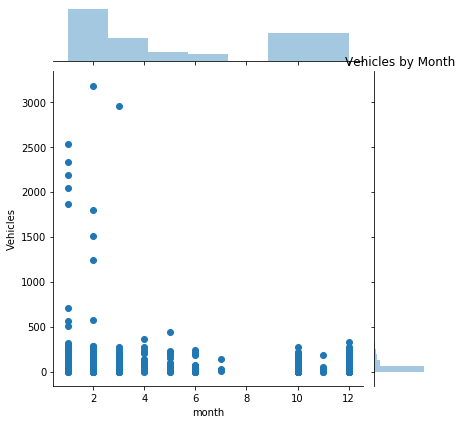

In [47]:
# plotting on date
plt.figure(figsize=(10,6))

sns.jointplot(x='month',y='Vehicles',data=df_transport)

plt.title('Vehicles by Month')

###### Renaming a Feature Column and Removing a Value.


In [48]:
df_transport.rename(columns = { 'Date': 'date', 'Zip Code':'zipcode', 'Model Year': 'modelyear', 'Fuel': 'fuel', 'Make': 'make', 'Light_Duty': 'lightduty', 'Vehicles': 'vehicles'}, inplace = True) 

df_transport.head()

,date,zipcode,modelyear,fuel,make,lightduty,vehicles,year,month,day
0,2018-10-01,90000,2006,Gasoline,OTHER/UNK,Yes,1.0,2018,10,1
1,2018-10-01,90002,2014,Gasoline,OTHER/UNK,Yes,1.0,2018,10,1
2,2018-10-01,90000,<2006,Gasoline,OTHER/UNK,Yes,13.0,2018,10,1
3,2018-10-01,90000,2017,Gasoline,OTHER/UNK,Yes,1.0,2018,10,1
4,2018-10-01,90000,<2006,Diesel and Diesel Hybrid,OTHER/UNK,No,55.0,2018,10,1


In [58]:
df = df_transport.loc[df_transport.modelyear != '<2006'].copy()

In [59]:
df['modelyear'].value_counts(0)

2007    87
2012    81
2008    79
2011    77
2010    71
2006    70
2015    61
2014    59
2017    57
2016    57
2009    53
2013    52
2018    42
2019     6
Name: modelyear, dtype: int64

###### Hiding Categorical colums
Converting Yes/No to 1/0

In [60]:
df['lightduty'].value_counts(0)

Yes    771
No      80
--       1
Name: lightduty, dtype: int64

In [61]:
df.head()

,date,zipcode,modelyear,fuel,make,lightduty,vehicles,year,month,day
0,2018-10-01,90000,2006,Gasoline,OTHER/UNK,Yes,1.0,2018,10,1
1,2018-10-01,90002,2014,Gasoline,OTHER/UNK,Yes,1.0,2018,10,1
3,2018-10-01,90000,2017,Gasoline,OTHER/UNK,Yes,1.0,2018,10,1
16,2018-10-09,90001,2006,Diesel and Diesel Hybrid,Type_C,No,16.0,2018,10,9
17,2018-10-10,90001,2006,Diesel and Diesel Hybrid,OTHER/UNK,No,23.0,2018,10,10


In [62]:
df.loc[:,'lightduty'] = df['lightduty'].apply(lambda x: 0 if x=='No' else 1)

df['lightduty'].value_counts(0)

1    772
0     80
Name: lightduty, dtype: int64

In [63]:
df.head()

,date,zipcode,modelyear,fuel,make,lightduty,vehicles,year,month,day
0,2018-10-01,90000,2006,Gasoline,OTHER/UNK,1,1.0,2018,10,1
1,2018-10-01,90002,2014,Gasoline,OTHER/UNK,1,1.0,2018,10,1
3,2018-10-01,90000,2017,Gasoline,OTHER/UNK,1,1.0,2018,10,1
16,2018-10-09,90001,2006,Diesel and Diesel Hybrid,Type_C,0,16.0,2018,10,9
17,2018-10-10,90001,2006,Diesel and Diesel Hybrid,OTHER/UNK,0,23.0,2018,10,10


###### One-Hot Encoding Categorical Feature Columns
Panda provides a function called "get_dummies" to convert a categorical variable into dummy/indicator variables.

In [65]:
data_dummy = pd.get_dummies(df[['zipcode', 'modelyear', 'fuel', 'make']], drop_first=True)

data_dummy.head()

,zipcode_90001,zipcode_90002,zipcode_90003,zipcode_9001,zipcode_na,modelyear_2007,modelyear_2008,modelyear_2009,modelyear_2010,modelyear_2011,...,make_Type_Q,make_Type_R,make_Type_S,make_Type_T,make_Type_U,make_Type_V,make_Type_W,make_Type_X,make_Type_Y,make_Type_Z
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
# Merging (concatenate) original data frame with 'dummy' dataframe.
df = pd.concat([df,data_dummy], axis=1)
df.head()

,date,zipcode,modelyear,fuel,make,lightduty,vehicles,year,month,day,...,make_Type_Q,make_Type_R,make_Type_S,make_Type_T,make_Type_U,make_Type_V,make_Type_W,make_Type_X,make_Type_Y,make_Type_Z
0,2018-10-01,90000,2006,Gasoline,OTHER/UNK,1,1.0,2018,10,1,...,0,0,0,0,0,0,0,0,0,0
1,2018-10-01,90002,2014,Gasoline,OTHER/UNK,1,1.0,2018,10,1,...,0,0,0,0,0,0,0,0,0,0
3,2018-10-01,90000,2017,Gasoline,OTHER/UNK,1,1.0,2018,10,1,...,0,0,0,0,0,0,0,0,0,0
16,2018-10-09,90001,2006,Diesel and Diesel Hybrid,Type_C,0,16.0,2018,10,9,...,0,0,0,0,0,0,0,0,0,0
17,2018-10-10,90001,2006,Diesel and Diesel Hybrid,OTHER/UNK,0,23.0,2018,10,10,...,0,0,0,0,0,0,0,0,0,0


In [68]:
# Dropping attributes for which we made dummy variables.  Let's also drop the Date column.

df = df.drop(['date','zipcode','modelyear', 'fuel', 'make'], axis=1)

KeyError: "['date' 'zipcode' 'modelyear' 'fuel' 'make'] not found in axis"

In [69]:
df.head()

,lightduty,vehicles,year,month,day,zipcode_90001,zipcode_90002,zipcode_90003,zipcode_9001,zipcode_na,...,make_Type_Q,make_Type_R,make_Type_S,make_Type_T,make_Type_U,make_Type_V,make_Type_W,make_Type_X,make_Type_Y,make_Type_Z
0,1,1.0,2018,10,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1.0,2018,10,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1.0,2018,10,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,0,16.0,2018,10,9,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,0,23.0,2018,10,10,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


###### Temporal feature column

In [70]:
print ('Unique values of month:',df.month.unique())
print ('Unique values of day:',df.day.unique())
print ('Unique values of year:',df.year.unique())

Unique values of month: [10 11 12  1  2  3  4  5  6  7]
Unique values of day: [ 1  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31
  2  3  4  5  6  7  8]
Unique values of year: [2018 2019]


In [71]:
# Here we map each temporal variable onto a circle such that the lowest value for that variable appears right next to the largest value. We compute the x- and y- component of that point using the sin and cos trigonometric functions.
df['day_sin'] = np.sin(df.day*(2.*np.pi/31))
df['day_cos'] = np.cos(df.day*(2.*np.pi/31))
df['month_sin'] = np.sin((df.month-1)*(2.*np.pi/12))
df['month_cos'] = np.cos((df.month-1)*(2.*np.pi/12))

# Let's drop month, and day
df = df.drop(['month','day','year'], axis=1)

In [72]:
df.tail(4)

,lightduty,vehicles,zipcode_90001,zipcode_90002,zipcode_90003,zipcode_9001,zipcode_na,modelyear_2007,modelyear_2008,modelyear_2009,...,make_Type_U,make_Type_V,make_Type_W,make_Type_X,make_Type_Y,make_Type_Z,day_sin,day_cos,month_sin,month_cos
995,1,4.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0.998717,-0.050649,0.5,-0.866025
996,1,25.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0.968077,-0.250653,0.5,-0.866025
997,1,1.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0.897805,-0.440394,0.5,-0.866025
998,1,3.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0.790776,-0.612106,0.5,-0.866025
